### joint-RPCA (for human MAFLD)

In [ ]:
biom convert \
 -i m16S_counts_g1pg3p_jrpca_microhits.txt \
 -o m16S_counts_g1pg3p_jrpca_microhits.biom \
 --table-type="OTU table" \
 --to-hdf5

qiime tools import \
 --input-path m16S_counts_g1pg3p_jrpca_microhits.biom \
 --output-path m16S_counts_g1pg3p_jrpca_microhits.qza \
 --type FeatureTable[Frequency]

biom convert \
 -i mtb_counts_g1pg3p_jrpca.txt \
 -o mtb_counts_g1pg3p_jrpca.biom \
 --table-type="OTU table" \
 --to-hdf5

qiime tools import \
 --input-path mtb_counts_g1pg3p_jrpca.biom \
 --output-path mtb_counts_g1pg3p_jrpca.qza \
 --type FeatureTable[Frequency]

biom convert \
 -i mtb_counts_g1pg3p_jrpca_annot.txt \
 -o mtb_counts_g1pg3p_jrpca_annot.biom \
 --table-type="OTU table" \
 --to-hdf5

qiime tools import \
 --input-path mtb_counts_g1pg3p_jrpca_annot.biom \
 --output-path mtb_counts_g1pg3p_jrpca_annot.qza \
 --type FeatureTable[Frequency]


In [ ]:
qiime gemelli joint-rpca \
    --i-tables caussy_nafld_mtb/mtb_counts_g1pg3p_jrpca.qza caussy_nafld_16s/m16S_counts_g1pg3p_jrpca_microhits.qza \
    --m-sample-metadata-file /mnt/zarrinpar/scratch/sfloresr/NASH_KF/NAFLD_human_val/caussy_nafld_16s/metadata_jrpca.txt \
    --p-train-test-column  'traintest' \
    --p-max-iterations 25 \
    --p-min-feature-frequency 5 \
    --o-biplot /mnt/zarrinpar/scratch/sfloresr/NASH_KF/NAFLD_human_val/caussy_nafld_16s/result_microhits/joint_biplot.qza\
    --o-distance-matrix /mnt/zarrinpar/scratch/sfloresr/NASH_KF/NAFLD_human_val/caussy_nafld_16s/result_microhits/joint_distance_matrix.qza\
    --o-cross-validation-error /mnt/zarrinpar/scratch/sfloresr/NASH_KF/NAFLD_human_val/caussy_nafld_16s/result_microhits/cross_validation_error.qza


In [ ]:
qiime longitudinal volatility \
    --m-metadata-file /mnt/zarrinpar/scratch/sfloresr/NASH_KF/NAFLD_human_val/caussy_nafld_16s/result_microhits/cross_validation_error.qza \
    --p-state-column 'iteration' \
    --o-visualization /mnt/zarrinpar/scratch/sfloresr/NASH_KF/NAFLD_human_val/caussy_nafld_16s/result_microhits/volatility_plot.qzv

In [ ]:
qiime emperor biplot \
    --i-biplot /mnt/zarrinpar/scratch/sfloresr/NASH_KF/NAFLD_human_val/caussy_nafld_16s/result_microhits/joint_biplot.qza \
    --m-sample-metadata-file /mnt/zarrinpar/scratch/sfloresr/NASH_KF/NAFLD_human_val/caussy_nafld_16s/metadata_jrpca.txt \
    --p-number-of-features 25 \
    --o-visualization /mnt/zarrinpar/scratch/sfloresr/NASH_KF/NAFLD_human_val/caussy_nafld_16s/result_microhits/emperor-biplot.qzv

In [ ]:
qiime diversity beta-group-significance \
    --i-distance-matrix /mnt/zarrinpar/scratch/sfloresr/NASH_KF/NAFLD_human_val/caussy_nafld_16s/result_microhits/joint_distance_matrix.qza \
    --m-metadata-file /mnt/zarrinpar/scratch/sfloresr/NASH_KF/NAFLD_human_val/caussy_nafld_16s/metadata_jrpca.txt \
    --m-metadata-column 'groups'\
    --p-pairwise \
    --o-visualization /mnt/zarrinpar/scratch/sfloresr/NASH_KF/NAFLD_human_val/caussy_nafld_16s/result_microhits/permanova-groups.qzv

In [ ]:
!qiime qurro loading-plot \
    --i-ranks /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/result_all/ordination-mtb.qza \
    --i-table /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/jrpca_mtb_feattab.qza \
    --m-sample-metadata-file /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/jrpca_metadata.txt \
    --m-feature-metadata-file /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/jrpca_mtb_annotation_key.txt \
    --o-visualization /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/result_all/Qurro-mtb.qzv

!qiime qurro loading-plot \
    --i-ranks /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/result_all/ordination-16s.qza \
    --i-table /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/jrpca_16s_feattab.qza \
    --m-sample-metadata-file /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/jrpca_metadata.txt \
    --m-feature-metadata-file /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/jrpca_16s_annotation_key.txt \
    --o-visualization /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/result_all/Qurro-16s.qzv

In [ ]:
qiime gemelli feature-correlation-table \
    --i-ordination /mnt/zarrinpar/scratch/sfloresr/NASH_KF/NAFLD_human_val/caussy_nafld_16s/result_microhits/joint_biplot.qza \
    --o-correlation-table /mnt/zarrinpar/scratch/sfloresr/NASH_KF/NAFLD_human_val/caussy_nafld_16s/result_microhits/correlation_table.qza

In [ ]:
qiime tools export --input-path /mnt/zarrinpar/scratch/sfloresr/NASH_KF/NAFLD_human_val/caussy_nafld_16s/result_microhits/correlation_table.qza \
--output-path /mnt/zarrinpar/scratch/sfloresr/NASH_KF/NAFLD_human_val/caussy_nafld_16s/result_microhits/correlation_table

In [1]:
# import data utils
import pandas as pd
import qiime2 as q2
# plotting
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

# export the correlations (Note: this step can take a few minutes)
correlation_table = pd.read_table('/mnt/zarrinpar/scratch/sfloresr/NASH_KF/NAFLD_human_val/caussy_nafld_16s/result_microhits/correlation_table/Correlation.tsv', sep='\t', index_col=0)
#correlation_table = q2.Artifact.load('/mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/correlation_table.qza')
#correlation_table_df = correlation_table.view(pd.DataFrame)

/opt/anaconda3/envs/mmvec-qiime2-2020.11/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3263: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [2]:
correlation_table.shape

(3266, 3266)

In [3]:
correlation_table.head()

,1538,237,851,8678,2696,194,5321,6770,164,742,...,TACGTAGGTGGCAAGCGTTGTCCGGATTTACTGGGTGTAAAGGGCGCGTAGGCGGAGAGACAAGTCAGATGTGAAATCTATGGGCTTAACCCATAAACTGCATTTGAAACTATCTCCCTTGAGTGATGGAGAGGCAAGCGGAATTCCTAG,TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGCTAAGCAAGTCAGAAGTGAAAGGCTGGGGCTCAACCCCGGGACTGCTTTTGAAACTGTTTGGCTAGAGTGCTGGAGAGGTAAGCGGAATTCCTAG,TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGCGAAGCAAGTCTGAAGTGAAAACCCAGGGCTCAACCCTGGGACTGCTTTGGAAACTGTTTTGCTAGAGTGTCGGAGAGGTAAGTGGAATTCCTAG,TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGTTAAGCAAGTCAGAAGTGAAAGGCTGGGGCTCAACCCCGGGACTGCTTTTGAAACTGTTTAACTAGAGTGCTGGAGAGGTAAGCGGAATTCCTAG,TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGCAGGCGGCATGATAAGTCTGATGTGAAAACCCAAGGCTCAACCATGGGACTGCATTGGAAACTGTCGTGCTGGAGTGTCGGAGAGGTAAGCGGAATTCCTAG,TACGTAGGTGGCAAGCGTTGTCCGGATTTACTGGGTGTAAAGGGCGTGTAGCCGGGGAGACAAGTCAGATGTGAAATCTGGAGGCTCAACCTCCAAACTGCATTTGAAACTGTTTCTCTTGAGTATCGGAGAGGTAATCGGAATTCCTAG,TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGTCAAGCAAGTCAGAAGTGAAAGGCTGGGGCTCAACCCCGGGACTGCTTTTGAAACTGTTTGACTAGAGTGCTGGAGAGGTAAGCGGAATTCCTAG,TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGTAAAGCAAGTCTGAAGTGAAAGCCCGCGGCTCAACTGCGGGACTGCTTTGGAAACTGTTTAACTGGAGTGTCGGAGAGGTAAGTGGAATTCCTAG,TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGCATGACAAGCCAGATGTGAAAACCCAGGGCTCAACCCTGGGACTGCATTTGGAACTGCCAGGCTGGAGTGCAGGAGAGGTAAGCGGAATTCCTAG,TACGTAGGTGGCAAGCGTTGTCCGGATTTACTGGGTGTAAAGGGCGCGTAGGCGGGGAGACAAGTCAGATGTGAAATCTATGGGCTTAACCCATAAACTGCATTTGAAACTATTTCTCTTGAGTGATGGAGAGGCAAGCGGAATTCCTAG
featureid,,,,,,,,,,,,,,,,,,,,,
1538,1.000000,0.785446,-0.987980,-0.476051,-0.990473,-0.971109,0.993253,-0.973675,-0.953076,0.993742,...,0.971983,-0.855766,0.998242,-0.651364,-0.841792,-0.976877,-0.917180,-0.337061,0.984597,-0.990155
237,0.785446,1.000000,-0.694577,-0.300609,-0.700114,-0.637805,0.776666,-0.891171,-0.867076,0.848298,...,0.857188,-0.727251,0.820673,-0.976444,-0.355450,-0.821164,-0.494495,-0.425832,0.825709,-0.784157
851,-0.987980,-0.694577,1.000000,0.415183,0.990564,0.996324,-0.991455,0.943320,0.935469,-0.969185,...,-0.925784,0.875135,-0.978763,0.553502,0.914328,0.937832,0.967151,0.225330,-0.974051,0.988213
8678,-0.476051,-0.300609,0.415183,1.000000,0.535267,0.375324,-0.372569,0.351112,0.226681,-0.440860,...,-0.601400,-0.047263,-0.464971,0.126934,0.269561,0.624898,0.340518,0.918074,-0.325370,0.348496
2696,-0.990473,-0.700114,0.990564,0.535267,1.000000,0.980115,-0.978003,0.933035,0.906769,-0.969265,...,-0.953748,0.807845,-0.981084,0.544634,0.883700,0.967569,0.945385,0.351839,-0.955998,0.971587


In [ ]:
# plot the correlations (Note: this step can take a few minutes)
sns.clustermap(correlation_table,yticklabels=False,
               xticklabels=False)

#plt.show()
plt.savefig('/mnt/zarrinpar/scratch/sfloresr/NASH_KF/NAFLD_human_val/caussy_nafld_16s/result_microhits/correlation_table/Correlation_heatmap_all.png',
            dpi=300,bbox_inches='tight')

In [ ]:
qiime gemelli joint-rpca \
    --i-tables caussy_nafld_mtb/mtb_counts_g1pg3p_jrpca_annot.qza caussy_nafld_16s/m16S_counts_g1pg3p_jrpca_microhits.qza \
    --m-sample-metadata-file /mnt/zarrinpar/scratch/sfloresr/NASH_KF/NAFLD_human_val/caussy_nafld_16s/metadata_jrpca.txt \
    --p-train-test-column  'traintest' \
    --p-max-iterations 25 \
    --p-min-feature-frequency 5 \
    --o-biplot /mnt/zarrinpar/scratch/sfloresr/NASH_KF/NAFLD_human_val/caussy_nafld_16s/result_microhits_annot/joint_biplot.qza\
    --o-distance-matrix /mnt/zarrinpar/scratch/sfloresr/NASH_KF/NAFLD_human_val/caussy_nafld_16s/result_microhits_annot/joint_distance_matrix.qza\
    --o-cross-validation-error /mnt/zarrinpar/scratch/sfloresr/NASH_KF/NAFLD_human_val/caussy_nafld_16s/result_microhits_annot/cross_validation_error.qza


In [ ]:
qiime longitudinal volatility \
    --m-metadata-file /mnt/zarrinpar/scratch/sfloresr/NASH_KF/NAFLD_human_val/caussy_nafld_16s/result_microhits_annot/cross_validation_error.qza \
    --p-state-column 'iteration' \
    --o-visualization /mnt/zarrinpar/scratch/sfloresr/NASH_KF/NAFLD_human_val/caussy_nafld_16s/result_microhits_annot/volatility_plot.qzv

In [ ]:
qiime emperor biplot \
    --i-biplot /mnt/zarrinpar/scratch/sfloresr/NASH_KF/NAFLD_human_val/caussy_nafld_16s/result_microhits_annot/joint_biplot.qza \
    --m-sample-metadata-file /mnt/zarrinpar/scratch/sfloresr/NASH_KF/NAFLD_human_val/caussy_nafld_16s/metadata_jrpca.txt \
    --p-number-of-features 25 \
    --o-visualization /mnt/zarrinpar/scratch/sfloresr/NASH_KF/NAFLD_human_val/caussy_nafld_16s/result_microhits_annot/emperor-biplot.qzv

In [ ]:
qiime diversity beta-group-significance \
    --i-distance-matrix /mnt/zarrinpar/scratch/sfloresr/NASH_KF/NAFLD_human_val/caussy_nafld_16s/result_microhits_annot/joint_distance_matrix.qza \
    --m-metadata-file /mnt/zarrinpar/scratch/sfloresr/NASH_KF/NAFLD_human_val/caussy_nafld_16s/metadata_jrpca.txt \
    --m-metadata-column 'groups'\
    --p-pairwise \
    --o-visualization /mnt/zarrinpar/scratch/sfloresr/NASH_KF/NAFLD_human_val/caussy_nafld_16s/result_microhits_annot/permanova-groups.qzv

In [ ]:
qiime gemelli feature-correlation-table \
    --i-ordination /mnt/zarrinpar/scratch/sfloresr/NASH_KF/NAFLD_human_val/caussy_nafld_16s/result_microhits_annot/joint_biplot.qza \
    --o-correlation-table /mnt/zarrinpar/scratch/sfloresr/NASH_KF/NAFLD_human_val/caussy_nafld_16s/result_microhits_annot/correlation_table.qza

In [ ]:
qiime tools export --input-path /mnt/zarrinpar/scratch/sfloresr/NASH_KF/NAFLD_human_val/caussy_nafld_16s/result_microhits_annot/correlation_table.qza \
--output-path /mnt/zarrinpar/scratch/sfloresr/NASH_KF/NAFLD_human_val/caussy_nafld_16s/result_microhits_annot/correlation_table

In [5]:
# import data utils
import pandas as pd
import qiime2 as q2
# plotting
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

# export the correlations (Note: this step can take a few minutes)
correlation_table = pd.read_table('/mnt/zarrinpar/scratch/sfloresr/NASH_KF/NAFLD_human_val/caussy_nafld_16s/result_microhits_annot/correlation_table/Correlation.tsv', sep='\t', index_col=0)
#correlation_table = q2.Artifact.load('/mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/correlation_table.qza')
#correlation_table_df = correlation_table.view(pd.DataFrame)

In [6]:
correlation_table.shape

(546, 546)

In [7]:
correlation_table.head()

,819,1776,664,243,759,5871,2671,1410,668,1153,...,TACGTAGGTGGCAAGCGTTGTCCGGATTTACTGGGTGTAAAGGGCGCGTAGGCGGAGAGACAAGTCAGATGTGAAATCTATGGGCTTAACCCATAAACTGCATTTGAAACTATCTCCCTTGAGTGATGGAGAGGCAAGCGGAATTCCTAG,TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGCTAAGCAAGTCAGAAGTGAAAGGCTGGGGCTCAACCCCGGGACTGCTTTTGAAACTGTTTGGCTAGAGTGCTGGAGAGGTAAGCGGAATTCCTAG,TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGCGAAGCAAGTCTGAAGTGAAAACCCAGGGCTCAACCCTGGGACTGCTTTGGAAACTGTTTTGCTAGAGTGTCGGAGAGGTAAGTGGAATTCCTAG,TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGTTAAGCAAGTCAGAAGTGAAAGGCTGGGGCTCAACCCCGGGACTGCTTTTGAAACTGTTTAACTAGAGTGCTGGAGAGGTAAGCGGAATTCCTAG,TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGCAGGCGGCATGATAAGTCTGATGTGAAAACCCAAGGCTCAACCATGGGACTGCATTGGAAACTGTCGTGCTGGAGTGTCGGAGAGGTAAGCGGAATTCCTAG,TACGTAGGTGGCAAGCGTTGTCCGGATTTACTGGGTGTAAAGGGCGTGTAGCCGGGGAGACAAGTCAGATGTGAAATCTGGAGGCTCAACCTCCAAACTGCATTTGAAACTGTTTCTCTTGAGTATCGGAGAGGTAATCGGAATTCCTAG,TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGTCAAGCAAGTCAGAAGTGAAAGGCTGGGGCTCAACCCCGGGACTGCTTTTGAAACTGTTTGACTAGAGTGCTGGAGAGGTAAGCGGAATTCCTAG,TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGTAAAGCAAGTCTGAAGTGAAAGCCCGCGGCTCAACTGCGGGACTGCTTTGGAAACTGTTTAACTGGAGTGTCGGAGAGGTAAGTGGAATTCCTAG,TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGCATGACAAGCCAGATGTGAAAACCCAGGGCTCAACCCTGGGACTGCATTTGGAACTGCCAGGCTGGAGTGCAGGAGAGGTAAGCGGAATTCCTAG,TACGTAGGTGGCAAGCGTTGTCCGGATTTACTGGGTGTAAAGGGCGCGTAGGCGGGGAGACAAGTCAGATGTGAAATCTATGGGCTTAACCCATAAACTGCATTTGAAACTATTTCTCTTGAGTGATGGAGAGGCAAGCGGAATTCCTAG
featureid,,,,,,,,,,,,,,,,,,,,,
819,1.000000,-0.980009,0.286437,-0.741724,-0.989064,0.135385,-0.914600,-0.953042,0.164086,-0.937359,...,0.926860,-0.802178,0.990923,0.932653,-0.986862,-0.920994,-0.628496,-0.510290,0.999494,-0.961623
1776,-0.980009,1.000000,-0.133086,0.794463,0.998489,-0.292158,0.974054,0.993999,-0.005848,0.985181,...,-0.907155,0.731108,-0.969541,-0.965450,0.938181,0.968724,0.738796,0.552452,-0.973385,0.981301
664,0.286437,-0.133086,1.000000,0.390095,-0.165506,-0.908975,-0.035133,-0.032763,0.991836,0.038610,...,0.497388,-0.114293,0.371040,-0.077210,-0.348111,-0.140230,0.564829,-0.447130,0.304341,-0.013693
243,-0.741724,0.794463,0.390095,1.000000,0.791951,-0.709455,0.750881,0.824993,0.492918,0.865048,...,-0.468370,0.807098,-0.654693,-0.925101,0.723153,0.678561,0.949401,-0.005656,-0.735475,0.890988
759,-0.989064,0.998489,-0.165506,0.791951,1.000000,-0.260098,0.960410,0.987282,-0.039095,0.977632,...,-0.910340,0.760588,-0.976955,-0.964095,0.955745,0.956725,0.719199,0.531302,-0.984160,0.982630


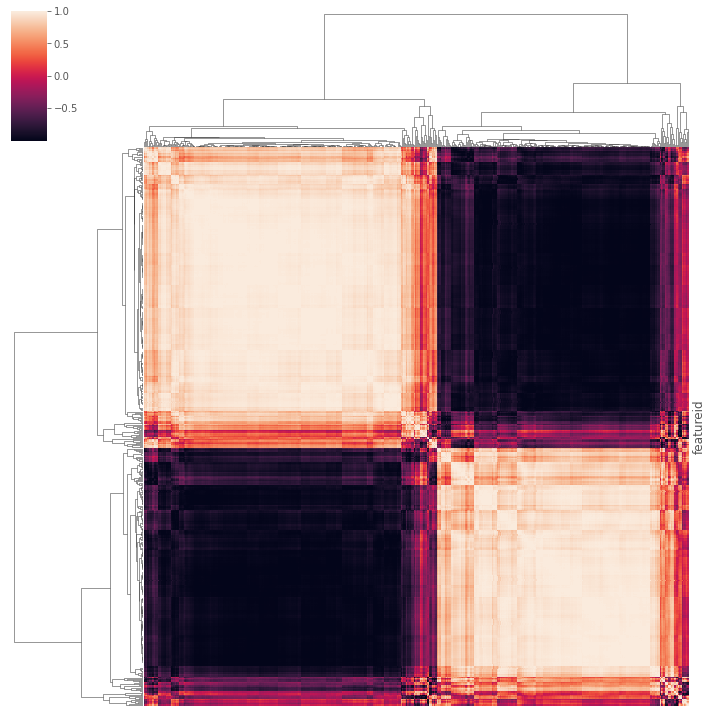

In [8]:
# plot the correlations (Note: this step can take a few minutes)
sns.clustermap(correlation_table,yticklabels=False,
               xticklabels=False)

#plt.show()
plt.savefig('/mnt/zarrinpar/scratch/sfloresr/NASH_KF/NAFLD_human_val/caussy_nafld_16s/result_microhits_annot/correlation_table/Correlation_heatmap_all.png',
            dpi=300,bbox_inches='tight')

In [ ]:
biom convert \
 -i m16S_counts_g1pg3p_jrpca_microhits.txt \
 -o m16S_counts_g1pg3p_jrpca_microhits.biom \
 --table-type="OTU table" \
 --to-hdf5

qiime tools import \
 --input-path m16S_counts_g1pg3p_jrpca_microhits.biom \
 --output-path m16S_counts_g1pg3p_jrpca_microhits.qza \
 --type FeatureTable[Frequency]

biom convert \
 -i mtb_counts_g1pg3p_jrpca_mousehits.txt \
 -o mtb_counts_g1pg3p_jrpca_mousehits.biom \
 --table-type="OTU table" \
 --to-hdf5

qiime tools import \
 --input-path mtb_counts_g1pg3p_jrpca_mousehits.biom \
 --output-path mtb_counts_g1pg3p_jrpca_mousehits.qza \
 --type FeatureTable[Frequency]

In [ ]:
qiime gemelli joint-rpca \
    --i-tables caussy_nafld_mtb/mtb_counts_g1pg3p_jrpca_mousehits.qza caussy_nafld_16s/m16S_counts_g1pg3p_jrpca_microhits.qza \
    --m-sample-metadata-file /mnt/zarrinpar/scratch/sfloresr/NASH_KF/NAFLD_human_val/caussy_nafld_16s/metadata_jrpca.txt \
    --p-train-test-column  'traintest' \
    --p-max-iterations 25 \
    --p-min-feature-frequency 5 \
    --o-biplot /mnt/zarrinpar/scratch/sfloresr/NASH_KF/NAFLD_human_val/caussy_nafld_16s/result_microhits_mouse/joint_biplot.qza\
    --o-distance-matrix /mnt/zarrinpar/scratch/sfloresr/NASH_KF/NAFLD_human_val/caussy_nafld_16s/result_microhits_mouse/joint_distance_matrix.qza\
    --o-cross-validation-error /mnt/zarrinpar/scratch/sfloresr/NASH_KF/NAFLD_human_val/caussy_nafld_16s/result_microhits_mouse/cross_validation_error.qza


In [ ]:
qiime longitudinal volatility \
    --m-metadata-file /mnt/zarrinpar/scratch/sfloresr/NASH_KF/NAFLD_human_val/caussy_nafld_16s/result_microhits_mouse/cross_validation_error.qza \
    --p-state-column 'iteration' \
    --o-visualization /mnt/zarrinpar/scratch/sfloresr/NASH_KF/NAFLD_human_val/caussy_nafld_16s/result_microhits_mouse/volatility_plot.qzv

In [ ]:
qiime emperor biplot \
    --i-biplot /mnt/zarrinpar/scratch/sfloresr/NASH_KF/NAFLD_human_val/caussy_nafld_16s/result_microhits_mouse/joint_biplot.qza \
    --m-sample-metadata-file /mnt/zarrinpar/scratch/sfloresr/NASH_KF/NAFLD_human_val/caussy_nafld_16s/metadata_jrpca.txt \
    --p-number-of-features 25 \
    --o-visualization /mnt/zarrinpar/scratch/sfloresr/NASH_KF/NAFLD_human_val/caussy_nafld_16s/result_microhits_mouse/emperor-biplot.qzv

In [ ]:
qiime diversity beta-group-significance \
    --i-distance-matrix /mnt/zarrinpar/scratch/sfloresr/NASH_KF/NAFLD_human_val/caussy_nafld_16s/result_microhits_mouse/joint_distance_matrix.qza \
    --m-metadata-file /mnt/zarrinpar/scratch/sfloresr/NASH_KF/NAFLD_human_val/caussy_nafld_16s/metadata_jrpca.txt \
    --m-metadata-column 'groups'\
    --p-pairwise \
    --o-visualization /mnt/zarrinpar/scratch/sfloresr/NASH_KF/NAFLD_human_val/caussy_nafld_16s/result_microhits_mouse/permanova-groups.qzv

In [ ]:
!qiime qurro loading-plot \
    --i-ranks /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/result_all/ordination-mtb.qza \
    --i-table /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/jrpca_mtb_feattab.qza \
    --m-sample-metadata-file /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/jrpca_metadata.txt \
    --m-feature-metadata-file /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/jrpca_mtb_annotation_key.txt \
    --o-visualization /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/result_all/Qurro-mtb.qzv

!qiime qurro loading-plot \
    --i-ranks /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/result_all/ordination-16s.qza \
    --i-table /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/jrpca_16s_feattab.qza \
    --m-sample-metadata-file /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/jrpca_metadata.txt \
    --m-feature-metadata-file /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/jrpca_16s_annotation_key.txt \
    --o-visualization /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/result_all/Qurro-16s.qzv

In [ ]:
qiime gemelli feature-correlation-table \
    --i-ordination /mnt/zarrinpar/scratch/sfloresr/NASH_KF/NAFLD_human_val/caussy_nafld_16s/result_microhits_mouse/joint_biplot.qza \
    --o-correlation-table /mnt/zarrinpar/scratch/sfloresr/NASH_KF/NAFLD_human_val/caussy_nafld_16s/result_microhits_mouse/correlation_table.qza

In [ ]:
qiime tools export --input-path /mnt/zarrinpar/scratch/sfloresr/NASH_KF/NAFLD_human_val/caussy_nafld_16s/result_microhits_mouse/correlation_table.qza \
--output-path /mnt/zarrinpar/scratch/sfloresr/NASH_KF/NAFLD_human_val/caussy_nafld_16s/result_microhits_mouse/correlation_table

In [9]:
# import data utils
import pandas as pd
import qiime2 as q2
# plotting
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

# export the correlations (Note: this step can take a few minutes)
correlation_table = pd.read_table('/mnt/zarrinpar/scratch/sfloresr/NASH_KF/NAFLD_human_val/caussy_nafld_16s/result_microhits_mouse/correlation_table/Correlation.tsv', sep='\t', index_col=0)
#correlation_table = q2.Artifact.load('/mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/correlation_table.qza')
#correlation_table_df = correlation_table.view(pd.DataFrame)

In [2]:
correlation_table.shape

(3266, 3266)

In [10]:
correlation_table.head()

,94,383,2890,1819,2339,2201,755,2251,4499,2357,...,TACGTAGGTGGCAAGCGTTGTCCGGATTTACTGGGTGTAAAGGGCGCGTAGGCGGAGAGACAAGTCAGATGTGAAATCTATGGGCTTAACCCATAAACTGCATTTGAAACTATCTCCCTTGAGTGATGGAGAGGCAAGCGGAATTCCTAG,TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGCTAAGCAAGTCAGAAGTGAAAGGCTGGGGCTCAACCCCGGGACTGCTTTTGAAACTGTTTGGCTAGAGTGCTGGAGAGGTAAGCGGAATTCCTAG,TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGCGAAGCAAGTCTGAAGTGAAAACCCAGGGCTCAACCCTGGGACTGCTTTGGAAACTGTTTTGCTAGAGTGTCGGAGAGGTAAGTGGAATTCCTAG,TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGTTAAGCAAGTCAGAAGTGAAAGGCTGGGGCTCAACCCCGGGACTGCTTTTGAAACTGTTTAACTAGAGTGCTGGAGAGGTAAGCGGAATTCCTAG,TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGCAGGCGGCATGATAAGTCTGATGTGAAAACCCAAGGCTCAACCATGGGACTGCATTGGAAACTGTCGTGCTGGAGTGTCGGAGAGGTAAGCGGAATTCCTAG,TACGTAGGTGGCAAGCGTTGTCCGGATTTACTGGGTGTAAAGGGCGTGTAGCCGGGGAGACAAGTCAGATGTGAAATCTGGAGGCTCAACCTCCAAACTGCATTTGAAACTGTTTCTCTTGAGTATCGGAGAGGTAATCGGAATTCCTAG,TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGTCAAGCAAGTCAGAAGTGAAAGGCTGGGGCTCAACCCCGGGACTGCTTTTGAAACTGTTTGACTAGAGTGCTGGAGAGGTAAGCGGAATTCCTAG,TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGTAAAGCAAGTCTGAAGTGAAAGCCCGCGGCTCAACTGCGGGACTGCTTTGGAAACTGTTTAACTGGAGTGTCGGAGAGGTAAGTGGAATTCCTAG,TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGCATGACAAGCCAGATGTGAAAACCCAGGGCTCAACCCTGGGACTGCATTTGGAACTGCCAGGCTGGAGTGCAGGAGAGGTAAGCGGAATTCCTAG,TACGTAGGTGGCAAGCGTTGTCCGGATTTACTGGGTGTAAAGGGCGCGTAGGCGGGGAGACAAGTCAGATGTGAAATCTATGGGCTTAACCCATAAACTGCATTTGAAACTATTTCTCTTGAGTGATGGAGAGGCAAGCGGAATTCCTAG
featureid,,,,,,,,,,,,,,,,,,,,,
94,1.000000,-0.367214,0.599574,0.227632,0.149843,-0.819642,0.455723,0.842775,-0.620611,0.313312,...,-0.276853,0.107883,0.206062,-0.613131,0.360626,-0.585413,0.194176,0.569044,0.039391,-0.467400
383,-0.367214,1.000000,-0.504100,0.821786,-0.593355,-0.231366,0.545438,-0.319026,0.282414,-0.997520,...,-0.743505,0.884638,-0.154301,-0.471774,0.296912,0.544835,0.840714,-0.365387,-0.008071,0.988713
2890,0.599574,-0.504100,1.000000,-0.180457,-0.326533,-0.298303,0.374336,0.110292,-0.968476,0.508034,...,-0.119876,-0.261673,0.870589,0.046299,-0.524292,-0.998622,-0.161001,-0.202979,0.760746,-0.621869
1819,0.227632,0.821786,-0.180457,1.000000,-0.507784,-0.744342,0.837534,0.196262,-0.063281,-0.853281,...,-0.939112,0.992615,-0.061487,-0.875596,0.553091,0.231462,0.997827,-0.012613,-0.011098,0.751328
2339,0.149843,-0.593355,-0.326533,-0.507784,1.000000,0.188467,-0.738237,0.563625,0.499882,0.562929,...,0.734978,-0.533984,-0.701669,0.141113,0.436580,0.291446,-0.562107,0.827838,-0.799045,-0.498837


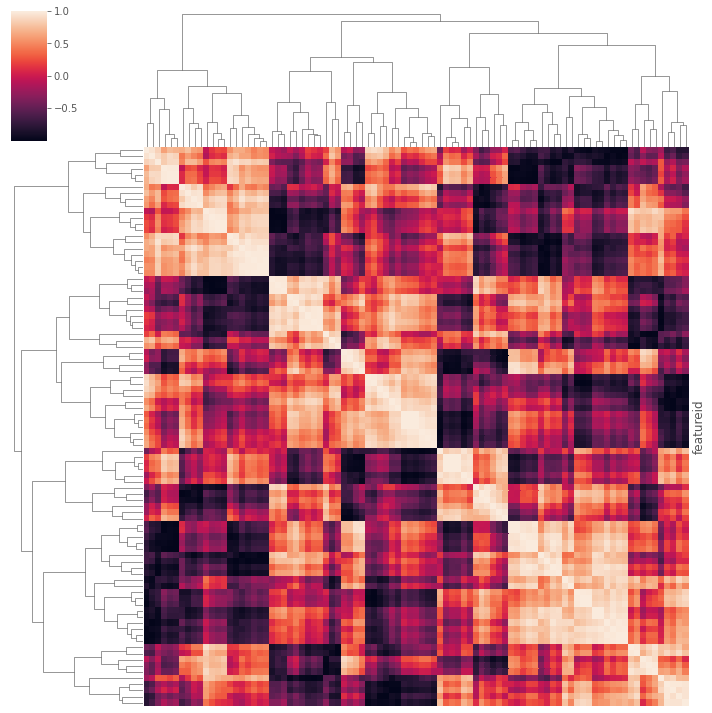

In [11]:
# plot the correlations (Note: this step can take a few minutes)
sns.clustermap(correlation_table,yticklabels=False,
               xticklabels=False)

#plt.show()
plt.savefig('/mnt/zarrinpar/scratch/sfloresr/NASH_KF/NAFLD_human_val/caussy_nafld_16s/result_microhits_mouse/correlation_table/Correlation_heatmap_all.png',
            dpi=300,bbox_inches='tight')

In [ ]:
qiime gemelli joint-rpca \
    --i-tables caussy_nafld_mtb/mtb_counts_g1pg3p_jrpca_annot.qza caussy_nafld_16s/m16S_counts_g1pg3p_jrpca_microhits.qza \
    --m-sample-metadata-file /mnt/zarrinpar/scratch/sfloresr/NASH_KF/NAFLD_human_val/caussy_nafld_16s/metadata_jrpca.txt \
    --p-train-test-column  'traintest' \
    --p-max-iterations 25 \
    --p-min-feature-frequency 5 \
    --o-biplot /mnt/zarrinpar/scratch/sfloresr/NASH_KF/NAFLD_human_val/caussy_nafld_16s/result_microhits_annot/joint_biplot.qza\
    --o-distance-matrix /mnt/zarrinpar/scratch/sfloresr/NASH_KF/NAFLD_human_val/caussy_nafld_16s/result_microhits_annot/joint_distance_matrix.qza\
    --o-cross-validation-error /mnt/zarrinpar/scratch/sfloresr/NASH_KF/NAFLD_human_val/caussy_nafld_16s/result_microhits_annot/cross_validation_error.qza


In [ ]:
qiime longitudinal volatility \
    --m-metadata-file /mnt/zarrinpar/scratch/sfloresr/NASH_KF/NAFLD_human_val/caussy_nafld_16s/result_microhits_annot/cross_validation_error.qza \
    --p-state-column 'iteration' \
    --o-visualization /mnt/zarrinpar/scratch/sfloresr/NASH_KF/NAFLD_human_val/caussy_nafld_16s/result_microhits_annot/volatility_plot.qzv

In [ ]:
qiime emperor biplot \
    --i-biplot /mnt/zarrinpar/scratch/sfloresr/NASH_KF/NAFLD_human_val/caussy_nafld_16s/result_microhits_annot/joint_biplot.qza \
    --m-sample-metadata-file /mnt/zarrinpar/scratch/sfloresr/NASH_KF/NAFLD_human_val/caussy_nafld_16s/metadata_jrpca.txt \
    --p-number-of-features 25 \
    --o-visualization /mnt/zarrinpar/scratch/sfloresr/NASH_KF/NAFLD_human_val/caussy_nafld_16s/result_microhits_annot/emperor-biplot.qzv

In [ ]:
qiime diversity beta-group-significance \
    --i-distance-matrix /mnt/zarrinpar/scratch/sfloresr/NASH_KF/NAFLD_human_val/caussy_nafld_16s/result_microhits_annot/joint_distance_matrix.qza \
    --m-metadata-file /mnt/zarrinpar/scratch/sfloresr/NASH_KF/NAFLD_human_val/caussy_nafld_16s/metadata_jrpca.txt \
    --m-metadata-column 'groups'\
    --p-pairwise \
    --o-visualization /mnt/zarrinpar/scratch/sfloresr/NASH_KF/NAFLD_human_val/caussy_nafld_16s/result_microhits_annot/permanova-groups.qzv

In [ ]:
qiime gemelli feature-correlation-table \
    --i-ordination /mnt/zarrinpar/scratch/sfloresr/NASH_KF/NAFLD_human_val/caussy_nafld_16s/result_microhits_annot/joint_biplot.qza \
    --o-correlation-table /mnt/zarrinpar/scratch/sfloresr/NASH_KF/NAFLD_human_val/caussy_nafld_16s/result_microhits_annot/correlation_table.qza

In [ ]:
qiime tools export --input-path /mnt/zarrinpar/scratch/sfloresr/NASH_KF/NAFLD_human_val/caussy_nafld_16s/result_microhits_annot/correlation_table.qza \
--output-path /mnt/zarrinpar/scratch/sfloresr/NASH_KF/NAFLD_human_val/caussy_nafld_16s/result_microhits_annot/correlation_table

In [5]:
# import data utils
import pandas as pd
import qiime2 as q2
# plotting
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

# export the correlations (Note: this step can take a few minutes)
correlation_table = pd.read_table('/mnt/zarrinpar/scratch/sfloresr/NASH_KF/NAFLD_human_val/caussy_nafld_16s/result_microhits_annot/correlation_table/Correlation.tsv', sep='\t', index_col=0)
#correlation_table = q2.Artifact.load('/mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/correlation_table.qza')
#correlation_table_df = correlation_table.view(pd.DataFrame)

In [6]:
correlation_table.shape

(546, 546)

In [7]:
correlation_table.head()

,819,1776,664,243,759,5871,2671,1410,668,1153,...,TACGTAGGTGGCAAGCGTTGTCCGGATTTACTGGGTGTAAAGGGCGCGTAGGCGGAGAGACAAGTCAGATGTGAAATCTATGGGCTTAACCCATAAACTGCATTTGAAACTATCTCCCTTGAGTGATGGAGAGGCAAGCGGAATTCCTAG,TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGCTAAGCAAGTCAGAAGTGAAAGGCTGGGGCTCAACCCCGGGACTGCTTTTGAAACTGTTTGGCTAGAGTGCTGGAGAGGTAAGCGGAATTCCTAG,TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGCGAAGCAAGTCTGAAGTGAAAACCCAGGGCTCAACCCTGGGACTGCTTTGGAAACTGTTTTGCTAGAGTGTCGGAGAGGTAAGTGGAATTCCTAG,TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGTTAAGCAAGTCAGAAGTGAAAGGCTGGGGCTCAACCCCGGGACTGCTTTTGAAACTGTTTAACTAGAGTGCTGGAGAGGTAAGCGGAATTCCTAG,TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGCAGGCGGCATGATAAGTCTGATGTGAAAACCCAAGGCTCAACCATGGGACTGCATTGGAAACTGTCGTGCTGGAGTGTCGGAGAGGTAAGCGGAATTCCTAG,TACGTAGGTGGCAAGCGTTGTCCGGATTTACTGGGTGTAAAGGGCGTGTAGCCGGGGAGACAAGTCAGATGTGAAATCTGGAGGCTCAACCTCCAAACTGCATTTGAAACTGTTTCTCTTGAGTATCGGAGAGGTAATCGGAATTCCTAG,TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGTCAAGCAAGTCAGAAGTGAAAGGCTGGGGCTCAACCCCGGGACTGCTTTTGAAACTGTTTGACTAGAGTGCTGGAGAGGTAAGCGGAATTCCTAG,TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGTAAAGCAAGTCTGAAGTGAAAGCCCGCGGCTCAACTGCGGGACTGCTTTGGAAACTGTTTAACTGGAGTGTCGGAGAGGTAAGTGGAATTCCTAG,TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGCATGACAAGCCAGATGTGAAAACCCAGGGCTCAACCCTGGGACTGCATTTGGAACTGCCAGGCTGGAGTGCAGGAGAGGTAAGCGGAATTCCTAG,TACGTAGGTGGCAAGCGTTGTCCGGATTTACTGGGTGTAAAGGGCGCGTAGGCGGGGAGACAAGTCAGATGTGAAATCTATGGGCTTAACCCATAAACTGCATTTGAAACTATTTCTCTTGAGTGATGGAGAGGCAAGCGGAATTCCTAG
featureid,,,,,,,,,,,,,,,,,,,,,
819,1.000000,-0.980009,0.286437,-0.741724,-0.989064,0.135385,-0.914600,-0.953042,0.164086,-0.937359,...,0.926860,-0.802178,0.990923,0.932653,-0.986862,-0.920994,-0.628496,-0.510290,0.999494,-0.961623
1776,-0.980009,1.000000,-0.133086,0.794463,0.998489,-0.292158,0.974054,0.993999,-0.005848,0.985181,...,-0.907155,0.731108,-0.969541,-0.965450,0.938181,0.968724,0.738796,0.552452,-0.973385,0.981301
664,0.286437,-0.133086,1.000000,0.390095,-0.165506,-0.908975,-0.035133,-0.032763,0.991836,0.038610,...,0.497388,-0.114293,0.371040,-0.077210,-0.348111,-0.140230,0.564829,-0.447130,0.304341,-0.013693
243,-0.741724,0.794463,0.390095,1.000000,0.791951,-0.709455,0.750881,0.824993,0.492918,0.865048,...,-0.468370,0.807098,-0.654693,-0.925101,0.723153,0.678561,0.949401,-0.005656,-0.735475,0.890988
759,-0.989064,0.998489,-0.165506,0.791951,1.000000,-0.260098,0.960410,0.987282,-0.039095,0.977632,...,-0.910340,0.760588,-0.976955,-0.964095,0.955745,0.956725,0.719199,0.531302,-0.984160,0.982630


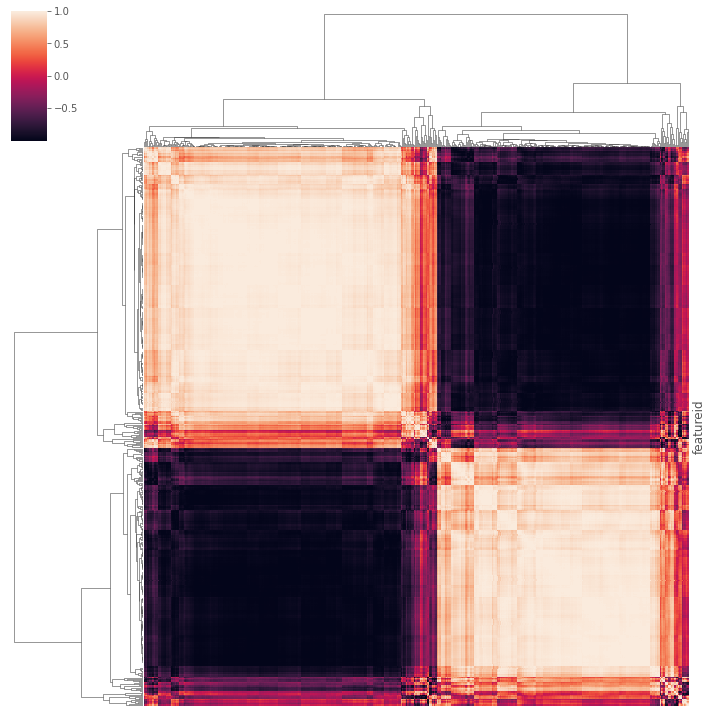

In [8]:
# plot the correlations (Note: this step can take a few minutes)
sns.clustermap(correlation_table,yticklabels=False,
               xticklabels=False)

#plt.show()
plt.savefig('/mnt/zarrinpar/scratch/sfloresr/NASH_KF/NAFLD_human_val/caussy_nafld_16s/result_microhits_annot/correlation_table/Correlation_heatmap_all.png',
            dpi=300,bbox_inches='tight')